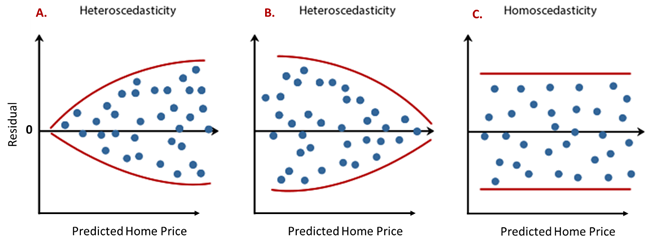

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('autos_dataset.csv')
df

symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19     3.4              10.0        102   
4            136         mpfi  3.19     3.4               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01     3.4              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [4]:
df.describe()

symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    16.000000  
25%    2145.000000    97.000000           8.600000   19.000000    25.000000  
50%    2414.000000   120.000000           9.000000   24.000000    30.000000  
75%    2935.000000   141.000000           9.400000   30.000000    34.000000  
max    4066.000000   326.000000          23.000000   49.000000    54.000000

In [3]:
df.T

0            1            2      3      4      5    \
symboling                    3            3            1      2      2      2   
normalized-losses            ?            ?            ?    164    164      ?   
make               alfa-romero  alfa-romero  alfa-romero   audi   audi   audi   
fuel-type                  gas          gas          gas    gas    gas    gas   
aspiration                 std          std          std    std    std    std   
num-of-doors               two          two          two   four   four    two   
body-style         convertible  convertible    hatchback  sedan  sedan  sedan   
drive-wheels               rwd          rwd          rwd    fwd    4wd    fwd   
engine-location          front        front        front  front  front  front   
wheel-base                88.6         88.6         94.5   99.8   99.4   99.8   
length                   168.8        168.8        171.2  176.6  176.6  177.3   
width                     64.1         64.1         65.5   66.2   66.4   66.3   
height                    48.8         48.8         52.4   54.3   54.3   53.1   
curb-weight               2548         2548         2823   2337   2824   2507   
engine-type               dohc         dohc         ohcv    ohc    ohc    ohc   
num-of-cylinders          four         four          six   four   five   five   
engine-size                130          130          152    109    136    136   
fuel-system               mpfi         mpfi         mpfi   mpfi   mpfi   mpfi   
bore                      3.47         3.47         2.68   3.19   3.19   3.19   
stroke                    2.68         2.68         3.47    3.4    3.4    3.4   
compression-ratio          9.0          9.0          9.0   10.0    8.0    8.5   
horsepower                 111          111          154    102    115    110   
peak-rpm                  5000         5000         5000   5500   5500   5500   
city-mpg                    21           21           19     24     18     19   
highway-mpg                 27           27           26     30     22     25   
price                    13495        16500        16500  13950  17450  15250   

                     6      7      8          9    ...    195    196    197  \
symboling              1      1      1          0  ...     -1     -2     -1   
normalized-losses    158      ?    158          ?  ...     74    103     74   
make                audi   audi   audi       audi  ...  volvo  volvo  volvo   
fuel-type            gas    gas    gas        gas  ...    gas    gas    gas   
aspiration           std    std  turbo      turbo  ...    std    std    std   
num-of-doors        four   four   four        two  ...   four   four   four   
body-style         sedan  wagon  sedan  hatchback  ...  wagon  sedan  wagon   
drive-wheels         fwd    fwd    fwd        4wd  ...    rwd    rwd    rwd   
engine-location    front  front  front      front  ...  front  front  front   
wheel-base         105.8  105.8  105.8       99.5  ...  104.3  104.3  104.3   
length             192.7  192.7  192.7      178.2  ...  188.8  188.8  188.8   
width               71.4   71.4   71.4       67.9  ...   67.2   67.2   67.2   
height              55.7   55.7   55.9       52.0  ...   57.5   56.2   57.5   
curb-weight         2844   2954   3086       3053  ...   3034   2935   3042   
engine-type          ohc    ohc    ohc        ohc  ...    ohc    ohc    ohc   
num-of-cylinders    five   five   five       five  ...   four   four   four   
engine-size          136    136    131        131  ...    141    141    141   
fuel-system         mpfi   mpfi   mpfi       mpfi  ...   mpfi   mpfi   mpfi   
bore                3.19   3.19   3.13       3.13  ...   3.78   3.78   3.78   
stroke               3.4    3.4    3.4        3.4  ...   3.15   3.15   3.15   
compression-ratio    8.5    8.5    8.3        7.0  ...    9.5    9.5    9.5   
horsepower           110    110    140        160  ...    114    114    114   
peak-rpm            55

In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.replace({'?':np.nan},inplace=True)

In [7]:
df

symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19     3.4              10.0        102   
4            136         mpfi  3.19     3.4               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01     3.4              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [8]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [9]:
df.symboling.nunique()

6

In [10]:
df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [11]:
df['normalized-losses'].isnull().sum()

41

In [12]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [13]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [14]:
df.drop(['make','fuel-type','aspiration','body-style', 'drive-wheels', 'engine-location','engine-type','fuel-system'],axis=1,inplace=True)

In [15]:
df

symboling normalized-losses num-of-doors  wheel-base  length  width  \
0            3               NaN          two        88.6   168.8   64.1   
1            3               NaN          two        88.6   168.8   64.1   
2            1               NaN          two        94.5   171.2   65.5   
3            2               164         four        99.8   176.6   66.2   
4            2               164         four        99.4   176.6   66.4   
..         ...               ...          ...         ...     ...    ...   
200         -1                95         four       109.1   188.8   68.9   
201         -1                95         four       109.1   188.8   68.8   
202         -1                95         four       109.1   188.8   68.9   
203         -1                95         four       109.1   188.8   68.9   
204         -1                95         four       109.1   188.8   68.9   

     height  curb-weight num-of-cylinders  engine-size  bore stroke  \
0      48.8         2548             four          130  3.47   2.68   
1      48.8         2548             four          130  3.47   2.68   
2      52.4         2823              six          152  2.68   3.47   
3      54.3         2337             four          109  3.19    3.4   
4      54.3         2824             five          136  3.19    3.4   
..      ...          ...              ...          ...   ...    ...   
200    55.5         2952             four          141  3.78   3.15   
201    55.5         3049             four          141  3.78   3.15   
202    55.5         3012              six          173  3.58   2.87   
203    55.5         3217              six          145  3.01    3.4   
204    55.5         3062             four          141  3.78   3.15   

     compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
0                  9.0        111     5000        21           27  13495  
1                  9.0        111     5000        21           27  16500  
2                  9.0        154     5000        19           26  16500  
3                 10.0        102     5500        24           30  13950  
4                  8.0        115     5500        18           22  17450  
..                 ...        ...      ...       ...          ...    ...  
200                9.5        114     5400        23           28  16845  
201                8.7        160     5300        19           25  19045  
202                8.8        134     5500        18           23  21485  
203               23.0        106     4800        26           27  22470  
204                9.5        114     5400        19           25  22625  

[205 rows x 18 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   num-of-doors       203 non-null    object 
 3   wheel-base         205 non-null    float64
 4   length             205 non-null    float64
 5   width              205 non-null    float64
 6   height             205 non-null    float64
 7   curb-weight        205 non-null    int64  
 8   num-of-cylinders   205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  bore               201 non-null    object 
 11  stroke             201 non-null    object 
 12  compression-ratio  205 non-null    float64
 13  horsepower         203 non-null    object 
 14  peak-rpm           203 non-null    object 
 15  city-mpg           205 non-null    int64  
 16  highway-mpg        205 non

In [17]:
df.fillna(df.median(),inplace=True)

In [18]:
df

symboling normalized-losses num-of-doors  wheel-base  length  width  \
0            3             115.0          two        88.6   168.8   64.1   
1            3             115.0          two        88.6   168.8   64.1   
2            1             115.0          two        94.5   171.2   65.5   
3            2               164         four        99.8   176.6   66.2   
4            2               164         four        99.4   176.6   66.4   
..         ...               ...          ...         ...     ...    ...   
200         -1                95         four       109.1   188.8   68.9   
201         -1                95         four       109.1   188.8   68.8   
202         -1                95         four       109.1   188.8   68.9   
203         -1                95         four       109.1   188.8   68.9   
204         -1                95         four       109.1   188.8   68.9   

     height  curb-weight num-of-cylinders  engine-size  bore stroke  \
0      48.8         2548             four          130  3.47   2.68   
1      48.8         2548             four          130  3.47   2.68   
2      52.4         2823              six          152  2.68   3.47   
3      54.3         2337             four          109  3.19    3.4   
4      54.3         2824             five          136  3.19    3.4   
..      ...          ...              ...          ...   ...    ...   
200    55.5         2952             four          141  3.78   3.15   
201    55.5         3049             four          141  3.78   3.15   
202    55.5         3012              six          173  3.58   2.87   
203    55.5         3217              six          145  3.01    3.4   
204    55.5         3062             four          141  3.78   3.15   

     compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  price  
0                  9.0        111     5000        21           27  13495  
1                  9.0        111     5000        21           27  16500  
2                  9.0        154     5000        19           26  16500  
3                 10.0        102     5500        24           30  13950  
4                  8.0        115     5500        18           22  17450  
..                 ...        ...      ...       ...          ...    ...  
200                9.5        114     5400        23           28  16845  
201                8.7        160     5300        19           25  19045  
202                8.8        134     5500        18           23  21485  
203               23.0        106     4800        26           27  22470  
204                9.5        114     5400        19           25  22625  

[205 rows x 18 columns]

In [19]:
df.dtypes

symboling              int64
normalized-losses     object
num-of-doors          object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
num-of-cylinders      object
engine-size            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [20]:
df['normalized-losses'].unique()

array([115.0, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [21]:
df.bore.unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', 3.31, '3.39', '3.76', '3.58', '3.46', '3.8',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [22]:
df.stroke.unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', 3.29, '3.16', '3.64', '3.1', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36',
       '2.64', '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [23]:
df.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', 95.0, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [24]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', 5200.0, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [25]:
df.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', 10295.0, '16430', '16925', '20970', '21105', '24565',
       '30760', '41315', '36880', '5151', '6295', '6575', '5572', '6377',
       '7957', '6229', '6692', '7609', '8558', '8921', '12964', '6479',
       '6855', '5399', '6529', '7129', '7295', '7895', '9095', '8845',
       '10295', '12945', '10345', '6785', '11048', '32250', '35550',
       '36000', '5195', '6095', '6795', '6695', '7395', '10945', '11845',
       '13645', '15645', '8495', '10595', '10245', '10795', '11245',
       '18280', '18344', '25552', '28248', '28176', '31600', '34184',
       '35056', '40960', '45400', '16503', '5389', '6189', '6669', '7689',
       '9959', '8499', '12629', '14869', '14489', '6989', '8189', '9279',
       '5499', '7099', '6649', '6849', '7349', '7299', '7799', '7499',
       '7999', '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '1690

In [26]:
df['bore']= df['bore'].astype(float)
df['normalized-losses']= df['normalized-losses'].astype(float)
df['stroke']= df['stroke'].astype(float)
df['peak-rpm']= df['peak-rpm'].astype(float)
df['price']= df['price'].astype(float)
df['horsepower']= df['horsepower'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   num-of-doors       203 non-null    object 
 3   wheel-base         205 non-null    float64
 4   length             205 non-null    float64
 5   width              205 non-null    float64
 6   height             205 non-null    float64
 7   curb-weight        205 non-null    int64  
 8   num-of-cylinders   205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  bore               205 non-null    float64
 11  stroke             205 non-null    float64
 12  compression-ratio  205 non-null    float64
 13  horsepower         205 non-null    float64
 14  peak-rpm           205 non-null    float64
 15  city-mpg           205 non-null    int64  
 16  highway-mpg        205 non

In [28]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [29]:
df['num-of-doors'].isnull().sum()

2

In [30]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [31]:
df['num-of-doors'].fillna('four',inplace=True)

In [32]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [33]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [34]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# simplest Encoding:replacing the unique values wil numbers

In [35]:
df1['num-of-doors'].replace({'two':2,'four':4},inplace=True)

In [36]:
df1.dtypes

symboling              int64
normalized-losses    float64
num-of-doors           int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
num-of-cylinders      object
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Label Encoder

In [37]:
df1['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [38]:
sorted(df1['num-of-cylinders'].unique())

['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']

In [39]:
df1['num-of-cylinders']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num-of-cylinders, Length: 205, dtype: object

In [40]:
# creating an instance

label_enco = LabelEncoder()
label_enco.fit_transform(df1['num-of-cylinders'])


array([2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 5, 2, 2, 2, 2, 2, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2])

In [41]:
df1['num-of-cylinders'] = label_enco.fit_transform(df1['num-of-cylinders'])

In [42]:
df1.dtypes

symboling              int64
normalized-losses    float64
num-of-doors           int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
num-of-cylinders       int32
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [43]:
x = df1.drop('price',axis='columns')
y = df1.price

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

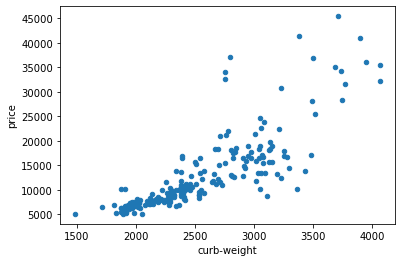

In [44]:
df1.plot(x='curb-weight',y='price',kind='scatter')

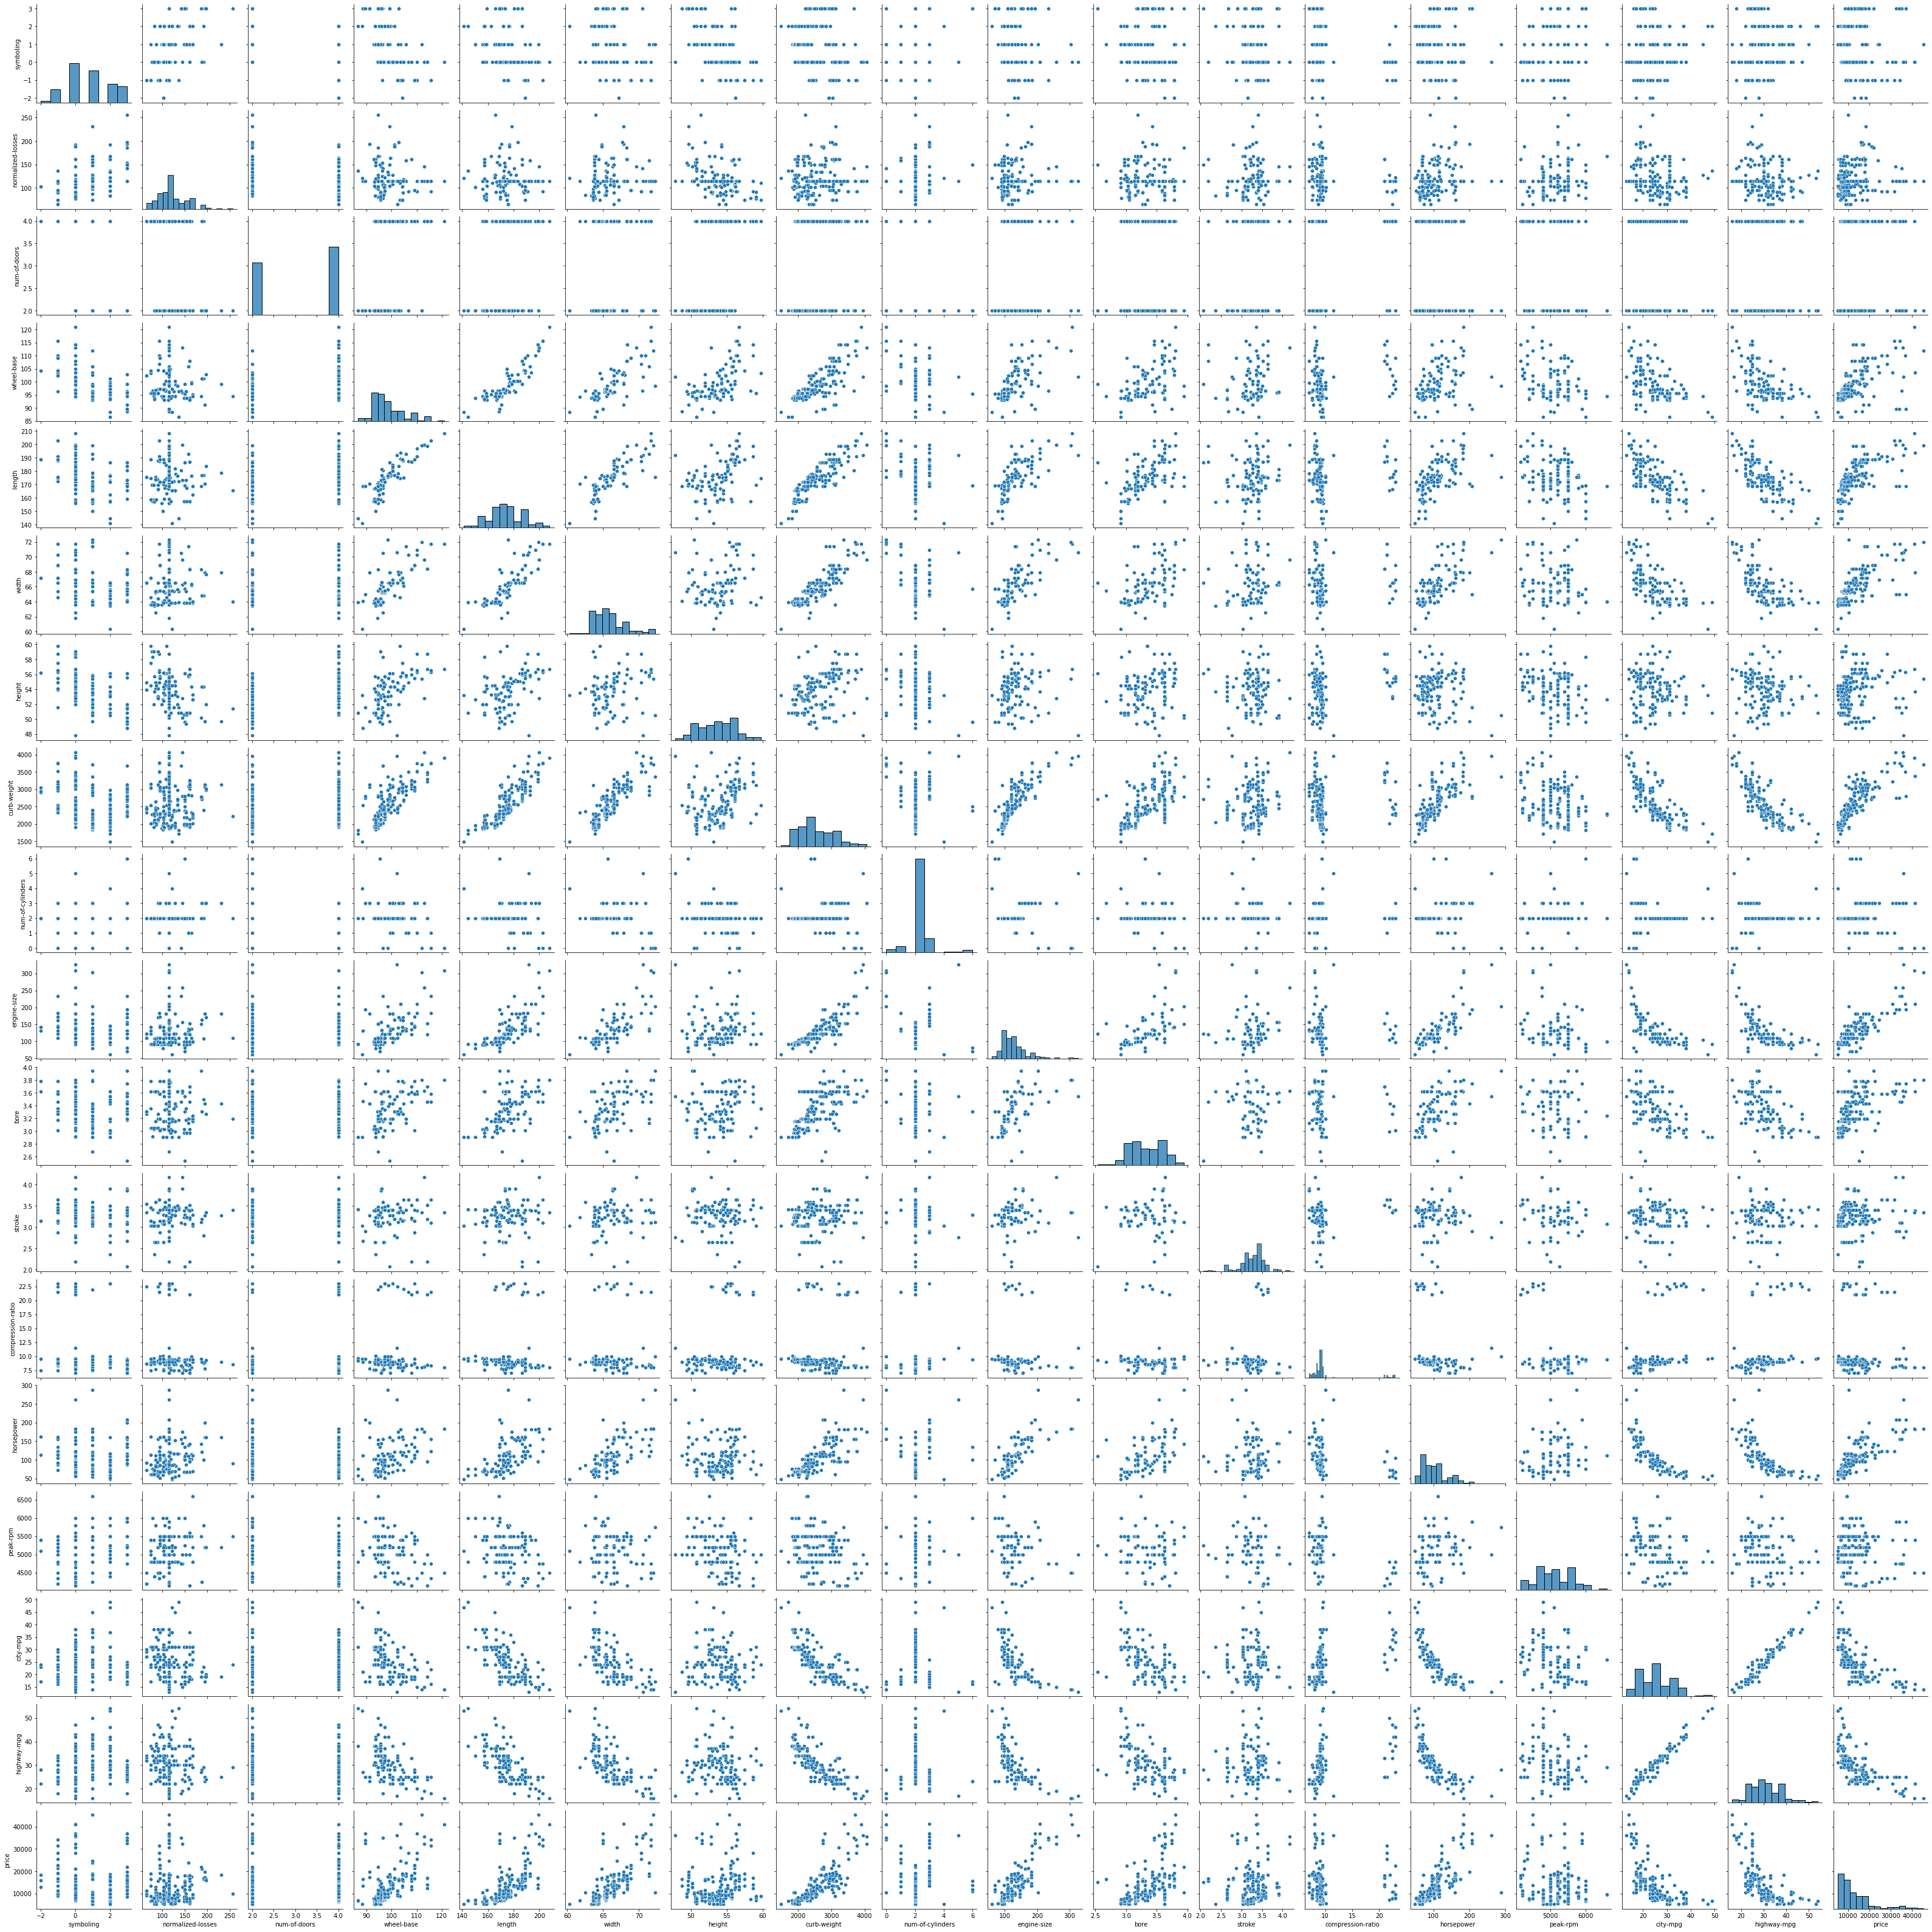

In [45]:
sns.pairplot(df1)

In [46]:
df1.corr()

symboling  normalized-losses  num-of-doors  wheel-base  \
symboling           1.000000           0.457484     -0.663595   -0.531954   
normalized-losses   0.457484           1.000000     -0.348850   -0.073709   
num-of-doors       -0.663595          -0.348850      1.000000    0.439635   
wheel-base         -0.531954          -0.073709      0.439635    1.000000   
length             -0.357612          -0.006837      0.385675    0.874587   
width              -0.232919           0.058378      0.197735    0.795144   
height             -0.541038          -0.365674      0.540286    0.589435   
curb-weight        -0.227691           0.064343      0.190720    0.776386   
num-of-cylinders    0.197762           0.171325     -0.155968   -0.184596   
engine-size        -0.105790           0.072536      0.013919    0.569329   
bore               -0.132563          -0.050428      0.110133    0.489556   
stroke             -0.004928           0.046739     -0.009353    0.159684   
compression-ratio  -0.178515          -0.114772      0.171797    0.249786   
horsepower          0.071064           0.166964     -0.127846    0.352876   
peak-rpm            0.273851           0.241134     -0.240473   -0.361338   
city-mpg           -0.035823          -0.189530     -0.014271   -0.470414   
highway-mpg         0.034606          -0.149357     -0.037452   -0.544082   
price              -0.080149           0.095489      0.046497    0.584847   

                     length     width    height  curb-weight  \
symboling         -0.357612 -0.232919 -0.541038    -0.227691   
normalized-losses -0.006837  0.058378 -0.365674     0.064343   
num-of-doors       0.385675  0.197735  0.540286     0.190720   
wheel-base         0.874587  0.795144  0.589435     0.776386   
length             1.000000  0.841118  0.491029     0.877728   
width              0.841118  1.000000  0.279210     0.867032   
height             0.491029  0.279210  1.000000     0.295572   
curb-weight        0.877728  0.867032  0.295572     1.000000   
num-of-cylinders  -0.109585 -0.194074 -0.283845    -0.047127   
engine-size        0.683360  0.735433  0.067149     0.850594   
bore               0.607016  0.559262  0.173506     0.648848   
stroke             0.128622  0.182708 -0.058994     0.168164   
compression-ratio  0.158414  0.181129  0.261214     0.151362   
horsepower         0.553337  0.641337 -0.109286     0.750927   
peak-rpm          -0.286362 -0.219374 -0.321113    -0.266358   
city-mpg          -0.670909 -0.642704 -0.048640    -0.757414   
highway-mpg       -0.704662 -0.677218 -0.107358    -0.797465   
price              0.686567  0.724558  0.140439     0.819817   

                   num-of-cylinders  engine-size      bore    stroke  \
symboling                  0.197762    -0.105790 -0.132563 -0.004928   
normalized-losses          0.171325     0.072536 -0.050428  0.046739   
num-of-doors              -0.155968     0.013919  0.110133 -0.009353   
wheel-base                -0.184596     0.569329  0.489556  0.159684   
length                    -0.109585     0.683360  0.607016  0.128622   
width                     -0.194074     0.735433  0.559262  0.182708   
height                    -0.283845     0.067149  0.173506 -0.058994   
curb-weight               -0.047127     0.850594  0.648848  0.168164   
num-of-cylinders           1.000000    -0.085613 -0.039907 -0.039405   
engine-size               -0.085613     1.000000  0.585636  0.200246   
bore                      -0.039907     0.585636  1.000000 -0.056054   
stroke                    -0.039405     0.200246 -0.056054  1.000000   
compression-ratio         -0.064701     0.028971  0.005468  0.185679   
horsepower                 0.115472     0.810216  0.574258  0.083804   
peak-rpm                   0.222405    -0.244383 -0.256600 -0.059716   
city-mpg                  -0.126422    -0.653658 -0.582627 -0.044973   
highway-mpg               -0.085897    -0.677470 -0.585352 -0.046389   
price                      0.013273     0.

In [67]:
df1.corr(method='pearson')

symboling  normalized-losses  num-of-doors  wheel-base  \
symboling           1.000000           0.457484     -0.663595   -0.531954   
normalized-losses   0.457484           1.000000     -0.348850   -0.073709   
num-of-doors       -0.663595          -0.348850      1.000000    0.439635   
wheel-base         -0.531954          -0.073709      0.439635    1.000000   
length             -0.357612          -0.006837      0.385675    0.874587   
width              -0.232919           0.058378      0.197735    0.795144   
height             -0.541038          -0.365674      0.540286    0.589435   
curb-weight        -0.227691           0.064343      0.190720    0.776386   
num-of-cylinders    0.197762           0.171325     -0.155968   -0.184596   
engine-size        -0.105790           0.072536      0.013919    0.569329   
bore               -0.132563          -0.050428      0.110133    0.489556   
stroke             -0.004928           0.046739     -0.009353    0.159684   
compression-ratio  -0.178515          -0.114772      0.171797    0.249786   
horsepower          0.071064           0.166964     -0.127846    0.352876   
peak-rpm            0.273851           0.241134     -0.240473   -0.361338   
city-mpg           -0.035823          -0.189530     -0.014271   -0.470414   
highway-mpg         0.034606          -0.149357     -0.037452   -0.544082   
price              -0.080149           0.095489      0.046497    0.584847   

                     length     width    height  curb-weight  \
symboling         -0.357612 -0.232919 -0.541038    -0.227691   
normalized-losses -0.006837  0.058378 -0.365674     0.064343   
num-of-doors       0.385675  0.197735  0.540286     0.190720   
wheel-base         0.874587  0.795144  0.589435     0.776386   
length             1.000000  0.841118  0.491029     0.877728   
width              0.841118  1.000000  0.279210     0.867032   
height             0.491029  0.279210  1.000000     0.295572   
curb-weight        0.877728  0.867032  0.295572     1.000000   
num-of-cylinders  -0.109585 -0.194074 -0.283845    -0.047127   
engine-size        0.683360  0.735433  0.067149     0.850594   
bore               0.607016  0.559262  0.173506     0.648848   
stroke             0.128622  0.182708 -0.058994     0.168164   
compression-ratio  0.158414  0.181129  0.261214     0.151362   
horsepower         0.553337  0.641337 -0.109286     0.750927   
peak-rpm          -0.286362 -0.219374 -0.321113    -0.266358   
city-mpg          -0.670909 -0.642704 -0.048640    -0.757414   
highway-mpg       -0.704662 -0.677218 -0.107358    -0.797465   
price              0.686567  0.724558  0.140439     0.819817   

                   num-of-cylinders  engine-size      bore    stroke  \
symboling                  0.197762    -0.105790 -0.132563 -0.004928   
normalized-losses          0.171325     0.072536 -0.050428  0.046739   
num-of-doors              -0.155968     0.013919  0.110133 -0.009353   
wheel-base                -0.184596     0.569329  0.489556  0.159684   
length                    -0.109585     0.683360  0.607016  0.128622   
width                     -0.194074     0.735433  0.559262  0.182708   
height                    -0.283845     0.067149  0.173506 -0.058994   
curb-weight               -0.047127     0.850594  0.648848  0.168164   
num-of-cylinders           1.000000    -0.085613 -0.039907 -0.039405   
engine-size               -0.085613     1.000000  0.585636  0.200246   
bore                      -0.039907     0.585636  1.000000 -0.056054   
stroke                    -0.039405     0.200246 -0.056054  1.000000   
compression-ratio         -0.064701     0.028971  0.005468  0.185679   
horsepower                 0.115472     0.810216  0.574258  0.083804   
peak-rpm                   0.222405    -0.244383 -0.256600 -0.059716   
city-mpg                  -0.126422    -0.653658 -0.582627 -0.044973   
highway-mpg               -0.085897    -0.677470 -0.585352 -0.046389   
price                      0.013273     0.

In [68]:
df1.corr(method='spearman')

symboling  normalized-losses  num-of-doors  wheel-base  \
symboling           1.000000           0.485062     -0.677486   -0.537958   
normalized-losses   0.485062           1.000000     -0.382841   -0.106478   
num-of-doors       -0.677486          -0.382841      1.000000    0.454213   
wheel-base         -0.537958          -0.106478      0.454213    1.000000   
length             -0.396365          -0.004229      0.368290    0.912391   
width              -0.253528           0.069225      0.211484    0.812300   
height             -0.523124          -0.358708      0.539234    0.632947   
curb-weight        -0.256490           0.060242      0.205396    0.765291   
num-of-cylinders    0.096895           0.146475     -0.111422   -0.109352   
engine-size        -0.176542           0.065798      0.076760    0.648305   
bore               -0.173771          -0.068982      0.117885    0.539135   
stroke             -0.014184           0.093016      0.001749    0.226003   
compression-ratio   0.023008          -0.056744     -0.027055   -0.126268   
horsepower         -0.008336           0.186746     -0.066825    0.503353   
peak-rpm            0.282545           0.254559     -0.207295   -0.312323   
city-mpg           -0.018317          -0.202238      0.030130   -0.492849   
highway-mpg         0.053316          -0.153164     -0.006666   -0.538680   
price              -0.142808           0.144303      0.127478    0.678793   

                     length     width    height  curb-weight  \
symboling         -0.396365 -0.253528 -0.523124    -0.256490   
normalized-losses -0.004229  0.069225 -0.358708     0.060242   
num-of-doors       0.368290  0.211484  0.539234     0.205396   
wheel-base         0.912391  0.812300  0.632947     0.765291   
length             1.000000  0.888201  0.525148     0.890415   
width              0.888201  1.000000  0.350279     0.863815   
height             0.525148  0.350279  1.000000     0.345852   
curb-weight        0.890415  0.863815  0.345852     1.000000   
num-of-cylinders  -0.037113 -0.039461 -0.217089     0.074976   
engine-size        0.782616  0.770615  0.199811     0.877739   
bore               0.640462  0.609863  0.219097     0.702182   
stroke             0.185702  0.241072 -0.023170     0.161779   
compression-ratio -0.192663 -0.145537  0.000231    -0.219100   
horsepower         0.661045  0.689384  0.009182     0.807489   
peak-rpm          -0.267792 -0.197409 -0.297096    -0.235663   
city-mpg          -0.670013 -0.687690 -0.068625    -0.812947   
highway-mpg       -0.697949 -0.700999 -0.132512    -0.834385   
price              0.798898  0.794549  0.257269     0.895057   

                   num-of-cylinders  engine-size      bore    stroke  \
symboling                  0.096895    -0.176542 -0.173771 -0.014184   
normalized-losses          0.146475     0.065798 -0.068982  0.093016   
num-of-doors              -0.111422     0.076760  0.117885  0.001749   
wheel-base                -0.109352     0.648305  0.539135  0.226003   
length                    -0.037113     0.782616  0.640462  0.185702   
width                     -0.039461     0.770615  0.609863  0.241072   
height                    -0.217089     0.199811  0.219097 -0.023170   
curb-weight                0.074976     0.877739  0.702182  0.161779   
num-of-cylinders           1.000000     0.073788  0.035062 -0.116383   
engine-size                0.073788     1.000000  0.705119  0.284524   
bore                       0.035062     0.705119  1.000000 -0.081167   
stroke                    -0.116383     0.284524 -0.081167  1.000000   
compression-ratio          0.088058    -0.234636 -0.162758 -0.067989   
horsepower                 0.185445     0.817370  0.638953  0.132820   
peak-rpm                   0.108387    -0.272023 -0.301523 -0.064895   
city-mpg                  -0.169931    -0.730056 -0.606194 -0.034702   
highway-mpg               -0.154236    -0.721342 -0.612432 -0.034432   
price                      0.137758     0.

In [69]:
df1.corr(method='kendall')

symboling  normalized-losses  num-of-doors  wheel-base  \
symboling           1.000000           0.379367     -0.610879   -0.411159   
normalized-losses   0.379367           1.000000     -0.321362   -0.066508   
num-of-doors       -0.610879          -0.321362      1.000000    0.377985   
wheel-base         -0.411159          -0.066508      0.377985    1.000000   
length             -0.289546          -0.000946      0.304216    0.745884   
width              -0.171270           0.047576      0.176948    0.650270   
height             -0.413240          -0.257611      0.447547    0.461663   
curb-weight        -0.176333           0.040566      0.168272    0.607289   
num-of-cylinders    0.083384           0.118593     -0.107491   -0.090118   
engine-size        -0.139711           0.051475      0.063980    0.501477   
bore               -0.136972          -0.050353      0.098653    0.410920   
stroke             -0.004944           0.064753      0.001461    0.150184   
compression-ratio   0.023642          -0.046498     -0.022986   -0.105684   
horsepower         -0.015263           0.126898     -0.055403    0.372986   
peak-rpm            0.220012           0.186753     -0.177789   -0.223459   
city-mpg           -0.009012          -0.146114      0.025460   -0.370165   
highway-mpg         0.039335          -0.108913     -0.005597   -0.407696   
price              -0.106001           0.101034      0.104400    0.537551   

                     length     width    height  curb-weight  \
symboling         -0.289546 -0.171270 -0.413240    -0.176333   
normalized-losses -0.000946  0.047576 -0.257611     0.040566   
num-of-doors       0.304216  0.176948  0.447547     0.168272   
wheel-base         0.745884  0.650270  0.461663     0.607289   
length             1.000000  0.723981  0.374643     0.723095   
width              0.723981  1.000000  0.258953     0.687244   
height             0.374643  0.258953  1.000000     0.244971   
curb-weight        0.723095  0.687244  0.244971     1.000000   
num-of-cylinders  -0.028568 -0.025183 -0.175962     0.061751   
engine-size        0.602141  0.593483  0.157296     0.724876   
bore               0.497987  0.449892  0.161119     0.538370   
stroke             0.120120  0.159273 -0.014781     0.123636   
compression-ratio -0.144845 -0.115198 -0.018825    -0.172427   
horsepower         0.476362  0.512058  0.014710     0.619925   
peak-rpm          -0.183459 -0.135318 -0.210172    -0.159176   
city-mpg          -0.507348 -0.521646 -0.052148    -0.653276   
highway-mpg       -0.531933 -0.525585 -0.094833    -0.673447   
price              0.624563  0.618959  0.175395     0.722021   

                   num-of-cylinders  engine-size      bore    stroke  \
symboling                  0.083384    -0.139711 -0.136972 -0.004944   
normalized-losses          0.118593     0.051475 -0.050353  0.064753   
num-of-doors              -0.107491     0.063980  0.098653  0.001461   
wheel-base                -0.090118     0.501477  0.410920  0.150184   
length                    -0.028568     0.602141  0.497987  0.120120   
width                     -0.025183     0.593483  0.449892  0.159273   
height                    -0.175962     0.157296  0.161119 -0.014781   
curb-weight                0.061751     0.724876  0.538370  0.123636   
num-of-cylinders           1.000000     0.062190  0.026688 -0.088258   
engine-size                0.062190     1.000000  0.537342  0.195456   
bore                       0.026688     0.537342  1.000000 -0.060635   
stroke                    -0.088258     0.195456 -0.060635  1.000000   
compression-ratio          0.075577    -0.186951 -0.132050 -0.041499   
horsepower                 0.140279     0.656314  0.471981  0.099941   
peak-rpm                   0.089907    -0.192472 -0.219613 -0.032166   
city-mpg                  -0.136984    -0.592515 -0.448902 -0.032162   
highway-mpg               -0.128260    -0.581816 -0.453775 -0.038136   
price                      0.107058     0.

<AxesSubplot:>

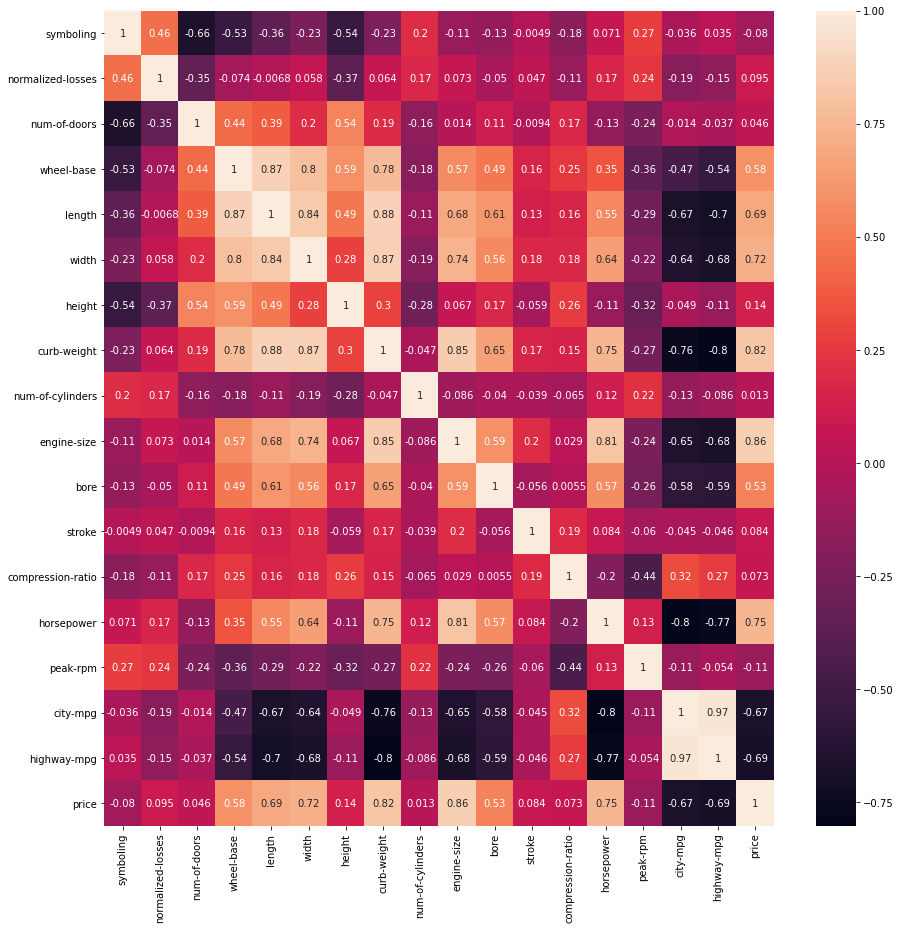

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)

In [48]:
df1.dtypes

symboling              int64
normalized-losses    float64
num-of-doors           int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
num-of-cylinders       int32
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=3)

In [50]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [51]:
linear_model.fit(x_train,y_train)

LinearRegression()

# residual

In [52]:
y_pred = linear_model.predict(x_test)
print('mse is - ',mean_squared_error(y_test,y_pred))
print('r2 score is - ',r2_score(y_test,y_pred))

mse is -  17882796.284611784
r2 score is -  0.7193092470150522


In [53]:
residual = y_test - y_pred
residual

189    -1207.040398
183    -2366.529176
118      233.109719
165    -3257.618258
160     3098.932323
70      8367.128677
173     1693.969067
154     -706.928842
25       134.810605
71      3714.175527
77      -602.952128
146    -1907.818461
121      716.233564
102   -10521.057317
47      -750.603817
188    -2575.029904
156      711.281160
38     -1391.025214
162     2546.632167
141    -1172.055268
202    -3961.962300
103   -10187.794091
34     -2257.086043
3       1967.776349
61       894.465188
115     2339.339173
14      5590.562051
46      -106.214198
12      4987.235644
101   -10773.088693
51       468.979981
Name: price, dtype: float64

In [54]:
np.mean(residual),np.median(residual)

(-525.1668682047699, -106.21419842276373)

<AxesSubplot:xlabel='price', ylabel='Density'>

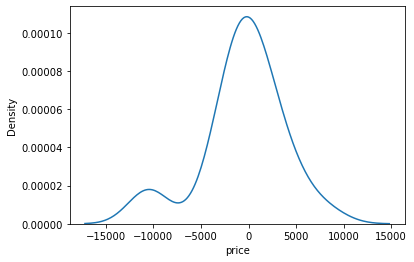

In [55]:
sns.kdeplot(residual)

# Statastical inference

In [56]:
from scipy.stats import shapiro, normaltest, kstest

### shapiro test

In [57]:
test_statistics, p_value = shapiro(residual)
print('p value is ',p_value)

if p_value > 0.05:
    print('Null Hypothesis Accepted! >> Data is normally distributed')
else:
    print('Alternate Hypothesis accepted! >> Data is not normally disrtibuted')

p value is  0.017752956598997116
Alternate Hypothesis accepted! >> Data is not normally disrtibuted


### Normality test

In [58]:
test_statistics, p_value = normaltest(residual)
print('p value is ',p_value)

if p_value > 0.05:
    print('Null Hypothesis Accepted! >> Data is normally distributed')
else:
    print('Alternate Hypothesis accepted! >> Data is not normally disrtibuted')

p value is  0.04412272908326086
Alternate Hypothesis accepted! >> Data is not normally disrtibuted


### Kstest

In [59]:
test_statistics, p_value = kstest(residual,'norm',mode={'approx'})
print('p value is ',p_value)

if p_value > 0.05:
    print('Null Hypothesis Accepted! >> Data is normally distributed')
else:
    print('Alternate Hypothesis accepted! >> Data is not normally disrtibuted')

p value is  3.372474647763268e-08
Alternate Hypothesis accepted! >> Data is not normally disrtibuted


# QQ plot (Quantile Quantile plot)

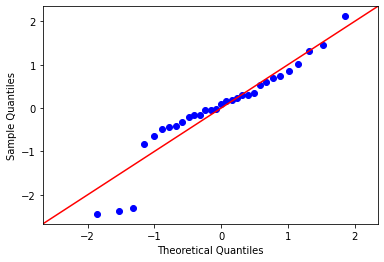

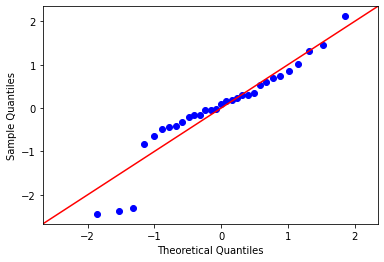

In [61]:
from scipy import stats
import statsmodels.api as sm

sm.qqplot(residual, line='45',dist= stats.norm, fit = True)

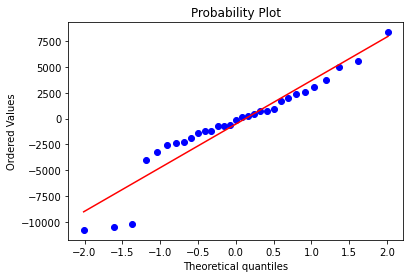

In [66]:
stats.probplot(residual,dist='norm', plot = plt)
plt.show()

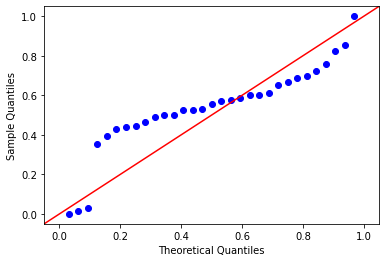

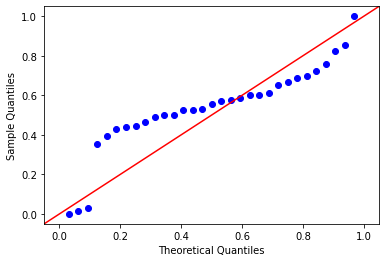

In [62]:
sm.qqplot(residual, line='45',dist= stats.uniform, fit = True)